# Dynamic Programming (Held-Karp Algorithm): This algorithm uses dynamic programming to store the minimum cost of visiting subsets of cities, reducing the complexity to 
By building up from smaller subsets, it ensures the optimal path but is still exponential, making it practical up to about 20-30 cities.

Optimal Path: [0, 15, 11, 13, 4, 8, 9, 16, 5, 14, 1, 7, 17, 10, 3, 6, 12, 2, 19, 18, 0]
Optimal Distance: 345.28


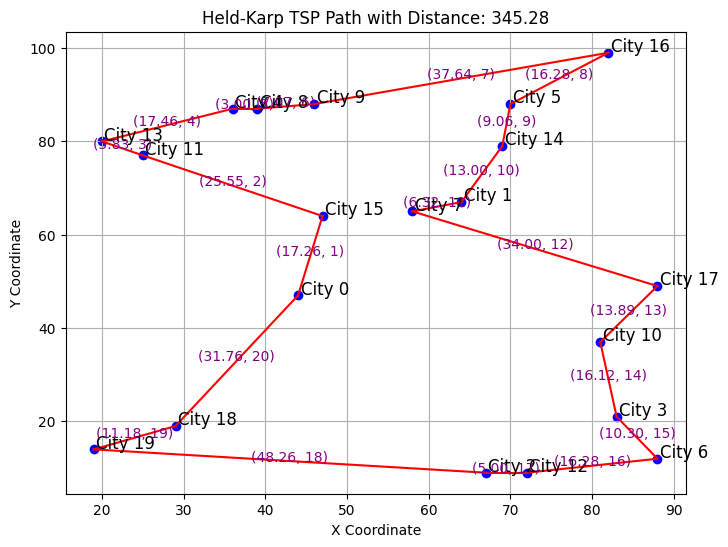

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

number_of_cities = 20

# Randomly generate coordinates for each city
coordinates = np.random.randint(0, 100, (number_of_cities, 2))

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Function to calculate the total distance for a given path
def calculate_total_distance(path, coordinates):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += euclidean_distance(coordinates[path[i]], coordinates[path[i + 1]])
    total_distance += euclidean_distance(coordinates[path[-1]], coordinates[path[0]])  # Return to the starting point
    return total_distance

# Held-Karp Algorithm for TSP (Dynamic Programming)
def tsp_held_karp(coordinates):
    n = len(coordinates)
    dist = [[euclidean_distance(coordinates[i], coordinates[j]) for j in range(n)] for i in range(n)]
    
    # Memoization table: dp[mask][i] - minimum distance to visit all cities in 'mask' ending at city 'i'
    dp = [[float('inf')] * n for _ in range(1 << n)]
    dp[1][0] = 0  # Start from city 0
    
    # Iterate through all subsets of cities
    for mask in range(1, 1 << n):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            for v in range(n):
                if mask & (1 << v) or u == v:
                    continue
                next_mask = mask | (1 << v)
                dp[next_mask][v] = min(dp[next_mask][v], dp[mask][u] + dist[u][v])
    
    # Reconstruct the optimal path
    mask = (1 << n) - 1
    last = 0
    optimal_distance = min(dp[mask][i] + dist[i][0] for i in range(1, n))
    path = [0]
    
    for _ in range(n - 1):
        next_city = min(range(n), key=lambda i: dp[mask][i] + dist[i][last] if mask & (1 << i) else float('inf'))
        path.append(next_city)
        mask ^= (1 << next_city)
        last = next_city
    path.append(0)
    
    return path, optimal_distance

# Solve TSP using Held-Karp Algorithm
optimal_path, optimal_distance = tsp_held_karp(coordinates)

print(f"Optimal Path: {optimal_path}")
print(f"Optimal Distance: {optimal_distance:.2f}")

# Visualization with edge labels for distance and path sequence
def plot_tsp_path(optimal_path, coordinates):
    plt.figure(figsize=(8, 6))
    for i, coord in enumerate(coordinates):
        plt.scatter(coord[0], coord[1], color='blue')
        plt.text(coord[0] + 0.3, coord[1] + 0.3, f"City {i}", fontsize=12)
    
    # Plot the optimal path
    for seq_num in range(len(optimal_path) - 1):
        start_city = optimal_path[seq_num]
        end_city = optimal_path[seq_num + 1]
        
        # Plot the edge
        plt.plot([coordinates[start_city][0], coordinates[end_city][0]],
                 [coordinates[start_city][1], coordinates[end_city][1]], 'r-')
        
        # Midpoint of the edge for labeling
        mid_x = (coordinates[start_city][0] + coordinates[end_city][0]) / 2
        mid_y = (coordinates[start_city][1] + coordinates[end_city][1]) / 2
        
        # Label with (Distance, Path Sequence Number)
        edge_distance = euclidean_distance(coordinates[start_city], coordinates[end_city])
        plt.text(mid_x, mid_y, f"({edge_distance:.2f}, {seq_num + 1})",
                 fontsize=10, color='purple', ha='center')

    plt.title(f"Held-Karp TSP Path with Distance: {optimal_distance:.2f}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

# Plot the result
plot_tsp_path(optimal_path, coordinates)


Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
Optimal Distance: 180.00


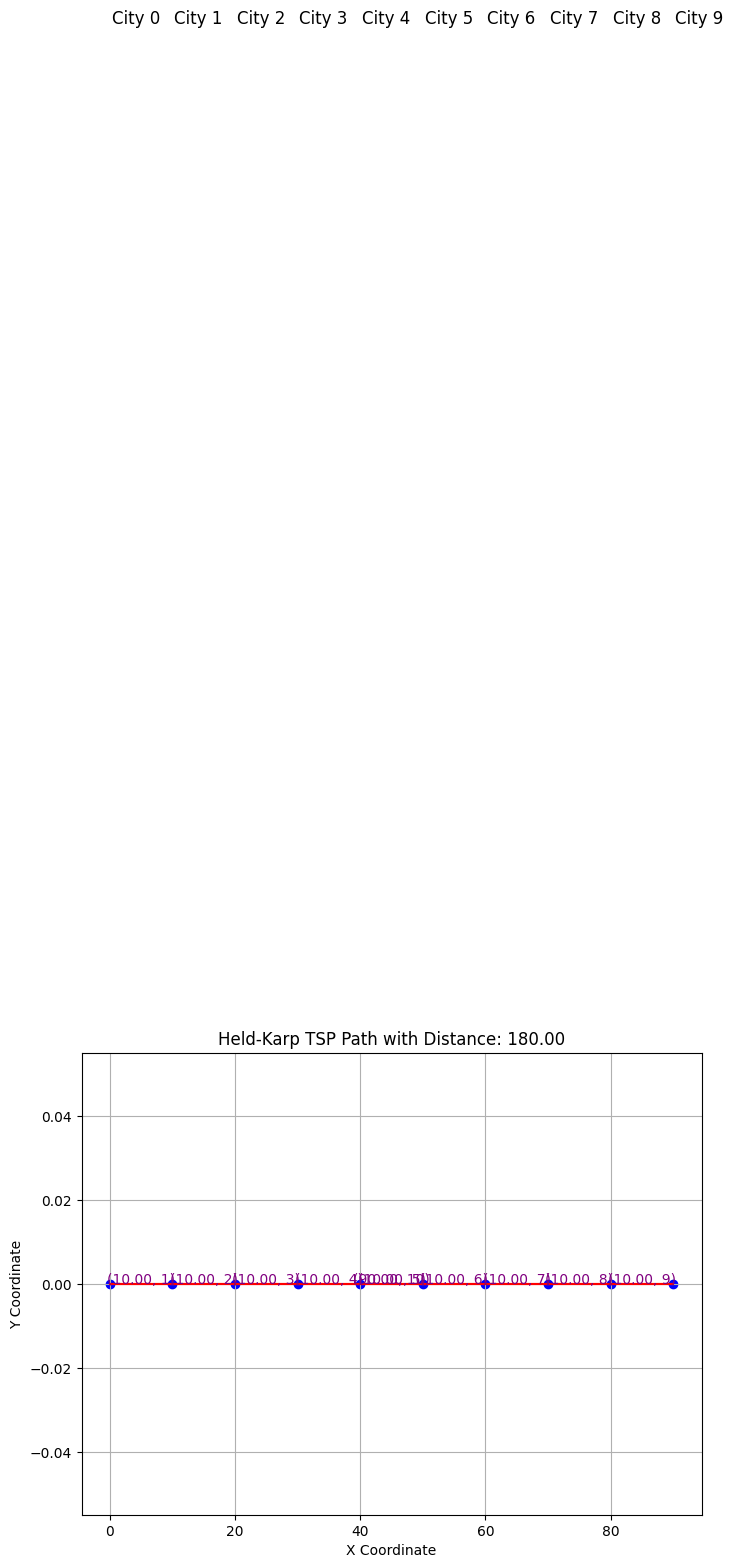

In [4]:
coordinates = np.array([
    [0, 0],
    [10, 0],
    [20, 0],
    [30, 0],
    [40, 0],
    [50, 0],
    [60, 0],
    [70, 0],
    [80, 0],
    [90, 0]
])

# Solve TSP using Held-Karp Algorithm
optimal_path, optimal_distance = tsp_held_karp(coordinates)

print(f"Optimal Path: {optimal_path}")
print(f"Optimal Distance: {optimal_distance:.2f}")

plot_tsp_path(optimal_path, coordinates)